# Import

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import random


import os
import time
import datetime
import calendar

from sklearn.metrics import mean_squared_error


import sklearn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import KFold, StratifiedKFold


from sklearn import clone
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.model_selection import train_test_split

from utils_model import * # expand later

# Data Read

In [2]:
data_dir = 'DATA'
data_file = 'train.csv'

In [3]:
# data read
data = pd.read_csv(os.path.join(data_dir,data_file))
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Exploration

We only do basic EDA

## Basic Exploration and Drop Null

In [4]:
data.shape

(1460, 81)

In [5]:
data[data.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [6]:
total_null = data.isnull().sum().sort_values(ascending=False).head(30) / data.shape[0]
total_null

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
YearRemodAdd    0.000000
MSSubClass      0.000000
Foundation      0.000000
ExterCond       0.000000
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
RoofStyle       0.000000
YearBuilt       0.000000
dtype: float64

count      1379.00000
mean     185479.51124
std       79023.89060
min       35311.00000
25%      134000.00000
50%      167500.00000
75%      217750.00000
max      755000.00000
Name: SalePrice, dtype: float64

count        81.000000
mean     103317.283951
std       32815.023389
min       34900.000000
25%       82500.000000
50%      100000.000000
75%      124000.000000
max      200500.000000
Name: SalePrice, dtype: float64


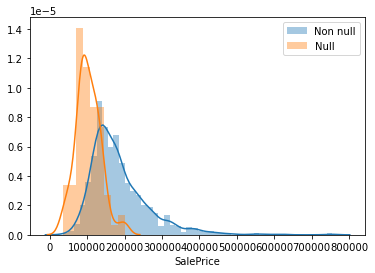

In [7]:
var = 'GarageCond'  # change it to other null value

print(data[~data[var].isna()]['SalePrice'].describe())
print('========\n')
print(data[data[var].isna()]['SalePrice'].describe())
sns.distplot(data[~data[var].isna()]['SalePrice'],label='Non null')
sns.distplot(data[data[var].isna()]['SalePrice'],label='Null')
plt.legend()

note that these 2 plots is not comparable, we want to see if there is pattern between null and non null in each columns. Turns out in FirePlaceQU,GarageCond,etc The price is much higher when compared to others

In [8]:
# Drop null > 50% as there are no distinct feature in them
data = data.drop(columns=list(total_null[total_null>0.5].index))

## Check  Variables

In [9]:
check_idx_features = [0,20]

print(data.iloc[:,check_idx_features[0]:check_idx_features[1]].info())
print()
data.iloc[:,check_idx_features[0]:check_idx_features[1]].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Street        1460 non-null   object 
 6   LotShape      1460 non-null   object 
 7   LandContour   1460 non-null   object 
 8   Utilities     1460 non-null   object 
 9   LotConfig     1460 non-null   object 
 10  LandSlope     1460 non-null   object 
 11  Neighborhood  1460 non-null   object 
 12  Condition1    1460 non-null   object 
 13  Condition2    1460 non-null   object 
 14  BldgType      1460 non-null   object 
 15  HouseStyle    1460 non-null   object 
 16  OverallQual   1460 non-null   int64  
 17  OverallCond   1460 non-null   int64  
 18  YearBuilt     1460 non-null 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000


In [10]:
data.iloc[:,check_idx_features[0]:check_idx_features[1]].select_dtypes(exclude=['object']).describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000


In [11]:
data.iloc[:,check_idx_features[0]:check_idx_features[1]].select_dtypes(include=['object']).describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726


In [12]:
categ_data = data.select_dtypes(include=['object'])
categ_data.describe().iloc[1,:].sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
SaleCondition     6
BsmtFinType2      6
RoofStyle         6
BsmtFinType1      6
Foundation        6
Heating           6
GarageType        6
MSZoning          5
BldgType          5
ExterCond         5
LotConfig         5
GarageCond        5
Electrical        5
GarageQual        5
FireplaceQu       5
HeatingQC         5
LotShape          4
LandContour       4
BsmtExposure      4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
PavedDrive        3
LandSlope         3
GarageFinish      3
Utilities         2
CentralAir        2
Street            2
Name: unique, dtype: object

25 is not that much cardinality number imo

In [13]:
print(categ_data.shape)

(1460, 39)


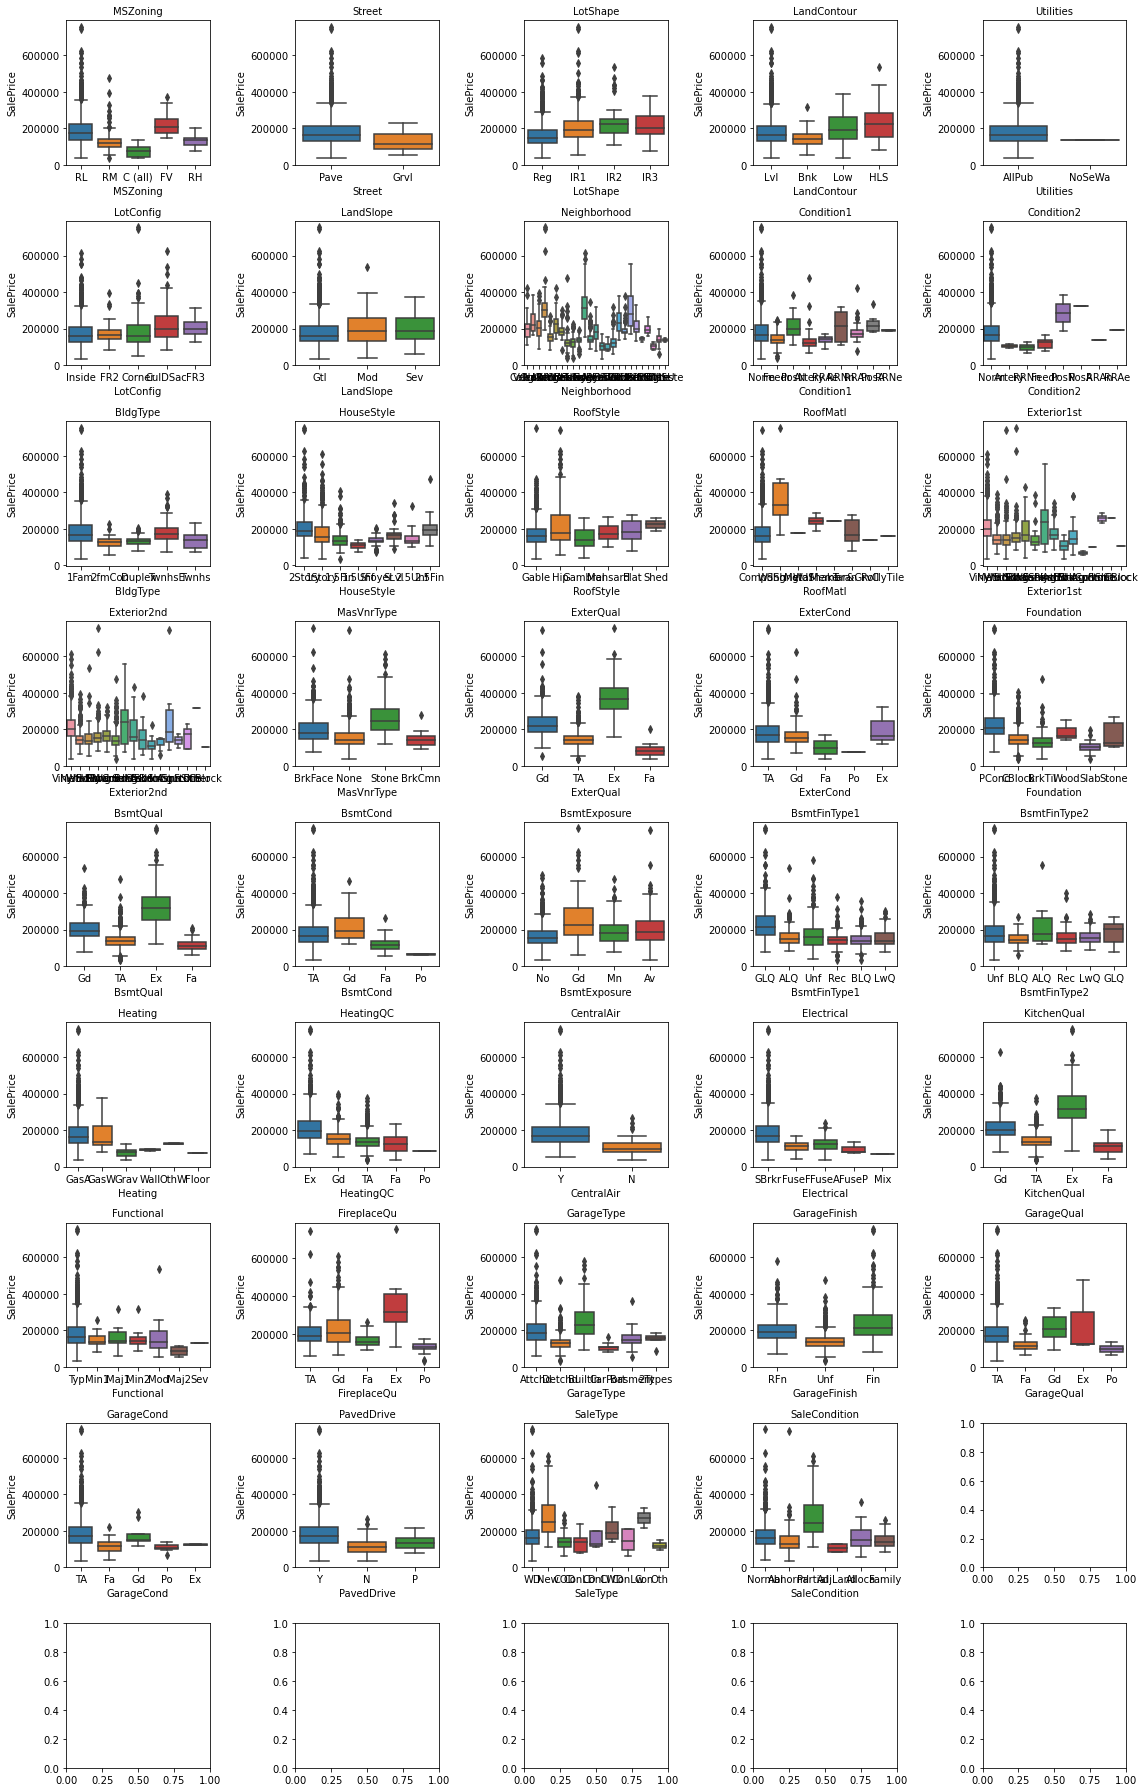

In [14]:
fig, axs = plt.subplots(9,5 ,figsize=(16,25))
col_idx = 0
for i in range(8):
    for j in range(5):
        sns.boxplot(x=categ_data.columns[col_idx],y='SalePrice',data=data,ax=axs[i,j])
        axs[i,j].set_title(categ_data.columns[col_idx],fontsize=10)
        col_idx+=1
        if col_idx==39:
            break
plt.tight_layout()
plt.show()

You can see that some variable have a significant different between each of their variables

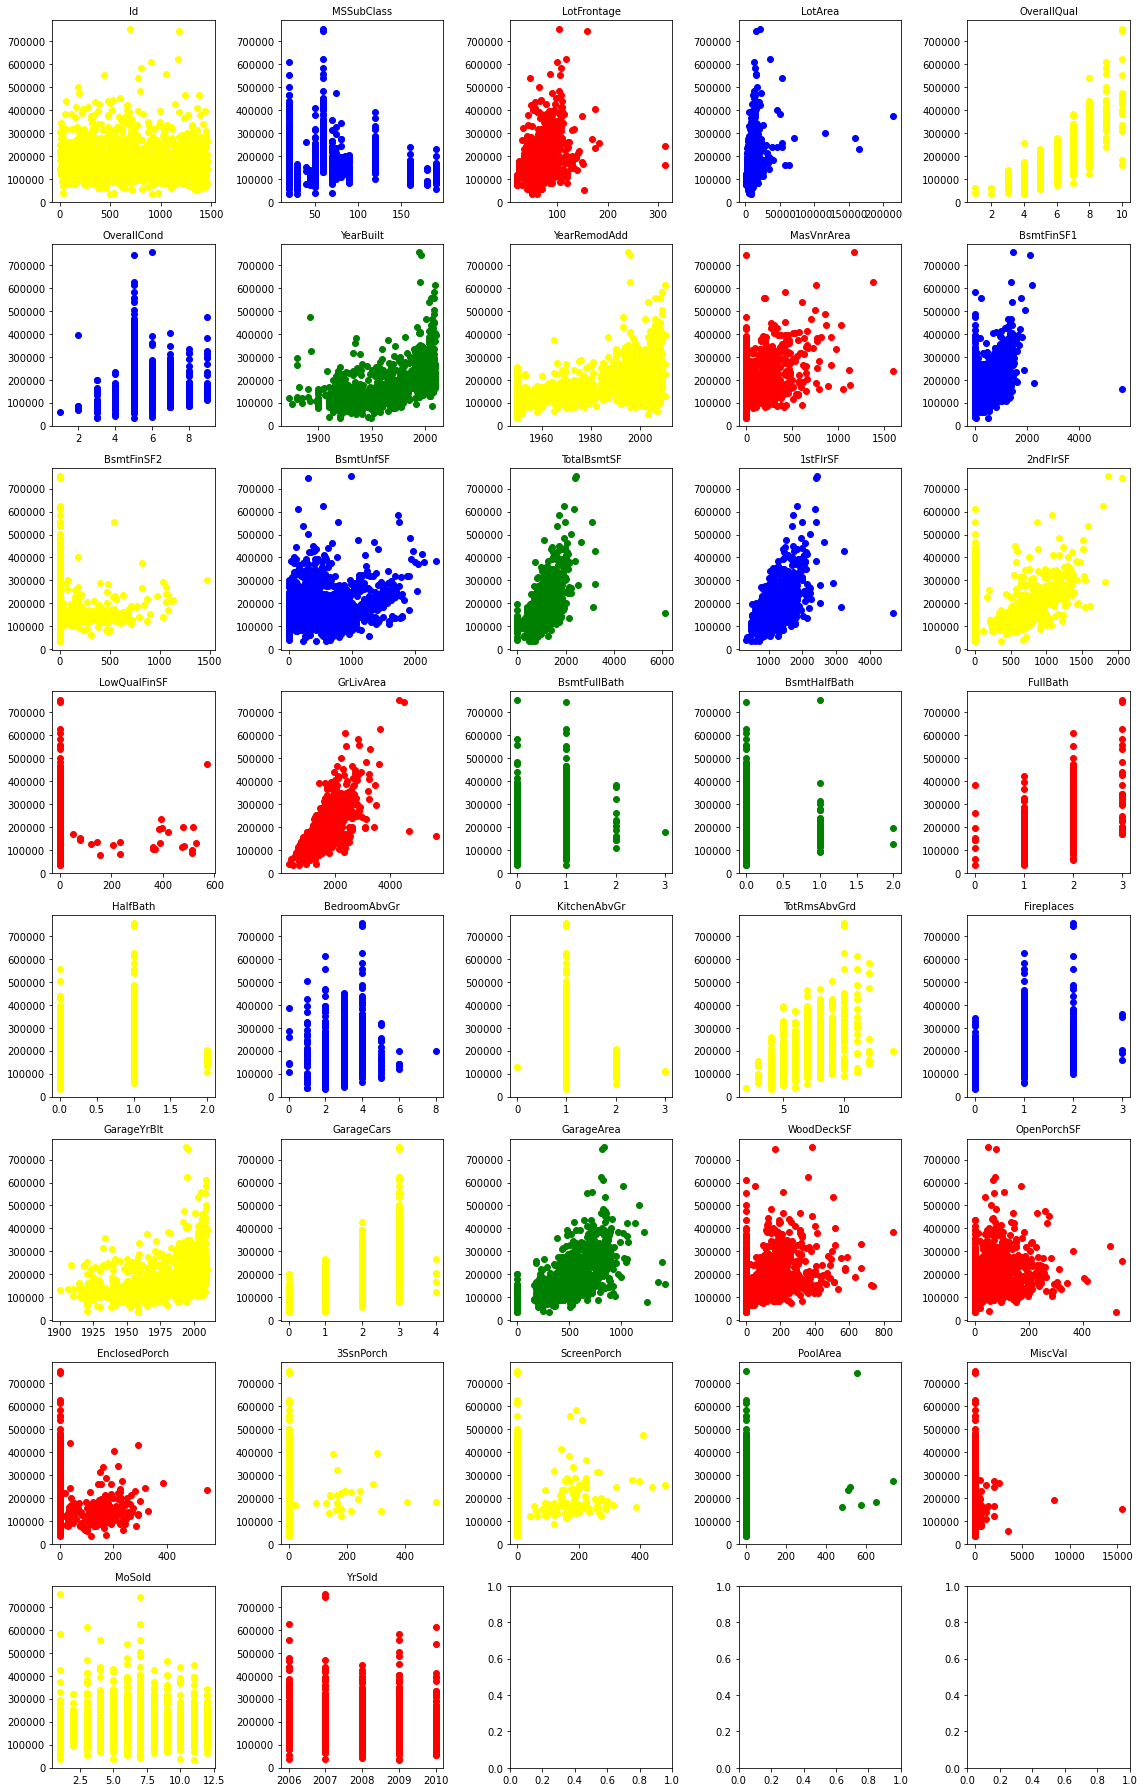

In [15]:
num_data = data.select_dtypes(exclude=['object'])
fig, axs = plt.subplots(8,5 ,figsize=(16,25))
col_idx = 0
for i in range(8):
    for j in range(5):
        axs[i,j].scatter(x=num_data[num_data.columns[col_idx]],y=num_data['SalePrice'],color =random.choice(['red','blue','green','yellow']) )
        axs[i,j].set_title(num_data.columns[col_idx],fontsize=10)
        col_idx+=1
        if col_idx==37:
            break
plt.tight_layout()
plt.show()

Feature that has a recognizable pattern could be a good feature candidate. Also some features have kinda random pattern. 

## Drop Collinearity 

even if we use ML algorithm that can handle multicollinearity, it's best to drop them as they are redundant (and make our model more complex)

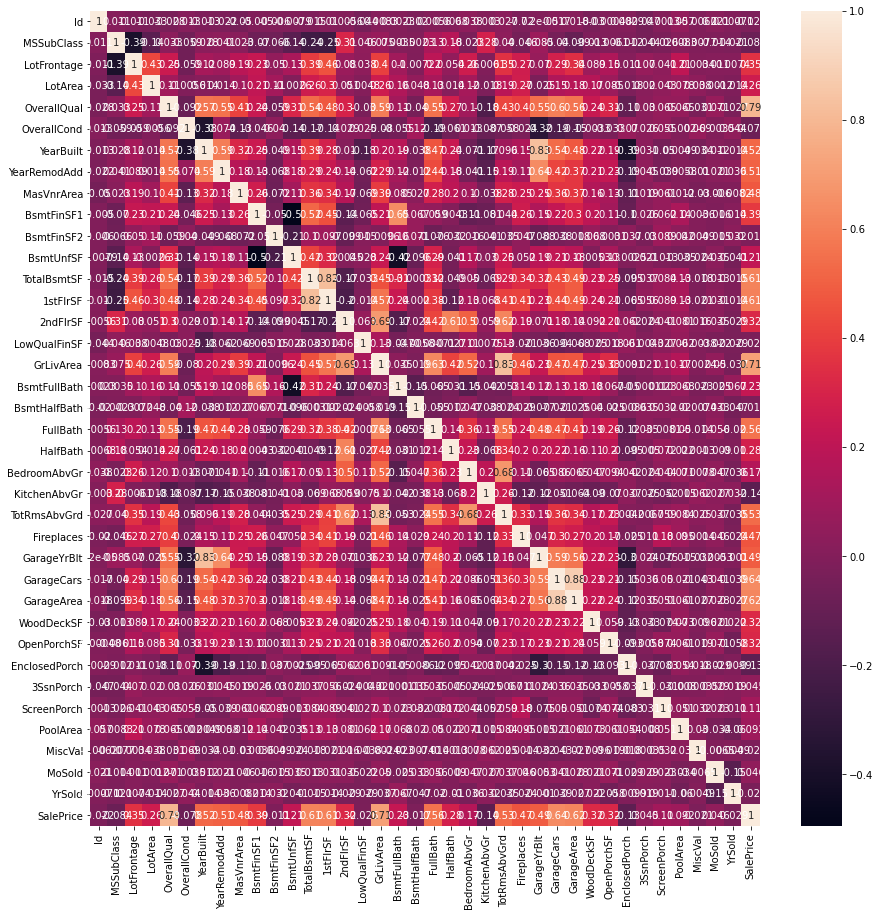

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),
            annot=True
           )
plt.show()

In [17]:
# more useful one
matrix_corr = data.corr()
matrix_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [18]:
matrix_corr['SalePrice'].sort_values(ascending=False).iloc[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

I think its best idea to drop variable that is unrelated with target when you are using linear model.But from this matrix you can see that the result is actually pretty good (compared to real life data which you are lucky if you have >0.4 )

In [19]:
high_correlation_features = []
threshold = 0.85


for i,col in enumerate(matrix_corr.iloc[:-1,:-1].columns):  # exclude target
    if col=='SalePrice':
        continue
    for j in range(len(matrix_corr.iloc[:-1,:-1].columns)): # exclude target
        if j==i or j>i-1:
            continue
        else:
            if np.abs(matrix_corr.iloc[i,j])>=threshold:
                print(matrix_corr.columns[i] + ' ' +matrix_corr.columns[j] + ' Highly Correlated')
                print(matrix_corr.iloc[i,j])
                print('=========\n')
                high_correlation_features.append([matrix_corr.columns[i],matrix_corr.columns[j]])

GarageArea GarageCars Highly Correlated
0.8824754142814603



We use 0.85 only for example. usually i go with 90% threshold. But here garage area and garage cars quite have a high correlation

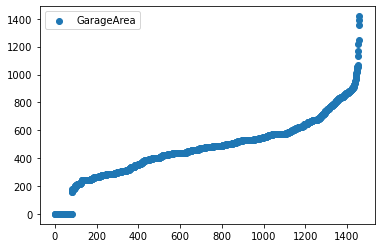

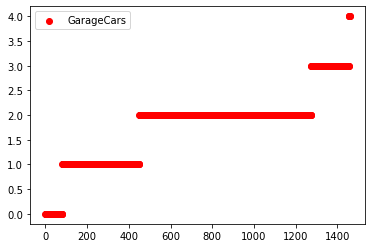

In [20]:
plt.scatter(x=[a for a in range(len(data))],y=data[high_correlation_features[0][0]].sort_values(),label=high_correlation_features[0][0])
plt.legend()
plt.show()
plt.scatter(x=[a for a in range(len(data))],y=data[high_correlation_features[0][1]].sort_values(),label=high_correlation_features[0][1],color='red')
plt.legend()
plt.show()


I think its still not a redudant variables as they both have a significant information value.
for example both 200-400 garageArea might only be filled with 1 car, but people would pay higher price for more garage space

In [21]:
import scipy.stats as ss


# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]   # return chi2, pvalue, degrees of freedom, expected value
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# matrix_corr_categ = categ_data.iloc[:,:2].corr(method = cramers_v)
# matrix_corr_categ
matrix_corr_categ = pd.DataFrame(index = categ_data.columns)
for col in categ_data.columns:
    corr = []
    for col2 in categ_data.columns:
        corr.append(cramers_v(data[col].fillna('nan'),data[col2].fillna('nan')))
    matrix_corr_categ[col] = corr
matrix_corr_categ


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSZoning,1.000000,0.249384,0.152191,0.102102,0.000000,0.063847,0.071793,0.640629,0.071332,0.058713,...,0.174365,0.000000,0.118858,0.211319,0.193753,0.125518,0.101743,0.218484,0.150903,0.136065
Street,0.249384,0.916263,0.033770,0.113834,0.201306,0.000000,0.176221,0.198616,0.164925,0.000000,...,0.061671,0.000000,0.000000,0.223118,0.000000,0.000000,0.000000,0.000000,0.110886,0.099458
LotShape,0.152191,0.033770,1.000000,0.126534,0.000000,0.220956,0.118896,0.244025,0.104624,0.000000,...,0.092337,0.000000,0.122451,0.142843,0.141348,0.075889,0.051170,0.075496,0.000000,0.001923
LandContour,0.102102,0.113834,0.126534,1.000000,0.000000,0.060028,0.457249,0.359864,0.000000,0.059311,...,0.096970,0.000000,0.075304,0.115914,0.101865,0.037273,0.000000,0.116491,0.030262,0.107176
Utilities,0.000000,0.201306,0.000000,0.000000,0.499142,0.084991,0.000000,0.095943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.218867,0.000000,0.000000,0.000000,0.000000,0.130824,0.076153
LotConfig,0.063847,0.000000,0.220956,0.060028,0.084991,1.000000,0.079137,0.136832,0.148130,0.091583,...,0.000000,0.000000,0.048692,0.056687,0.032233,0.015027,0.051661,0.029064,0.000000,0.034114
LandSlope,0.071793,0.176221,0.118896,0.457249,0.000000,0.079137,1.000000,0.315128,0.000000,0.000000,...,0.044702,0.074632,0.032056,0.108851,0.000000,0.000000,0.000000,0.000000,0.000000,0.037628
Neighborhood,0.640629,0.198616,0.244025,0.359864,0.095943,0.136832,0.315128,1.000000,0.184954,0.009701,...,0.444320,0.082737,0.304093,0.298913,0.416955,0.198174,0.172525,0.309300,0.169461,0.219449
Condition1,0.071332,0.164925,0.104624,0.000000,0.000000,0.148130,0.000000,0.184954,1.000000,0.210059,...,0.082777,0.000000,0.000000,0.089318,0.121021,0.028675,0.030468,0.102994,0.033961,0.000000
Condition2,0.058713,0.000000,0.000000,0.059311,0.000000,0.091583,0.000000,0.009701,0.210059,1.000000,...,0.089983,0.000000,0.000000,0.095325,0.000000,0.143488,0.000000,0.057618,0.000000,0.000000


In [22]:
high_correlation_features = []
threshold = 0.8


for i,col in enumerate(matrix_corr_categ.iloc[:-1,:-1].columns):  # exclude target
    if col=='SalePrice':
        continue
    for j in range(len(matrix_corr_categ.iloc[:-1,:-1].columns)): # exclude target
        if j==i or j>i-1:
            continue
        else:
            if matrix_corr_categ.iloc[i,j]>=threshold:
                print(matrix_corr_categ.columns[i] + ' ' +matrix_corr_categ.columns[j] + ' Highly Correlated')
                print(matrix_corr_categ.iloc[i,j])
                print('=========\n')
                high_correlation_features.append([matrix_corr_categ.columns[i],matrix_corr_categ.columns[j]])

Everything seems normal

## Target

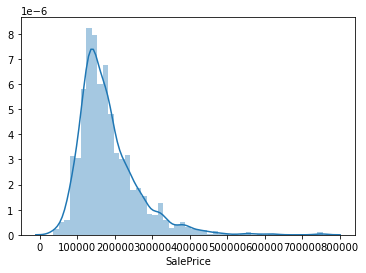

In [119]:
sns.distplot(data['SalePrice'])

In [121]:
data.sort_values('SalePrice',ascending=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
1169,1170,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,7,2006,WD,Normal,625000
898,899,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,New,Partial,611657
803,804,60,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,...,0,0,192,0,0,1,2009,New,Partial,582933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,31,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,...,172,0,0,0,0,7,2008,WD,Normal,40000
533,534,20,RL,50.0,5000,Pave,Reg,Low,AllPub,Inside,...,0,0,0,0,0,1,2007,WD,Normal,39300
968,969,50,RM,50.0,5925,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,WD,Abnorml,37900
916,917,20,C (all),50.0,9000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2006,WD,Abnorml,35311


Lets see whether this price consistent with high correlated features OverallQual,GrLivArea 

In [128]:
data.sort_values('SalePrice',ascending=False)[['GrLivArea','SalePrice']].head(20)

,GrLivArea,SalePrice
691,4316,755000
1182,4476,745000
1169,3627,625000
898,2364,611657
803,2822,582933
1046,2868,556581
440,2402,555000
769,3279,538000
178,2234,501837
798,3140,485000


It seems like these high SalePrice actually in line with these 2 features. We conclude that this was not caused by data error

There are more that we can do in these step, like outlier detection, distribution plot, etc for now we only foccused on check whether there are weird data

In [77]:
# %load_ext autoreload
# %autoreload 2
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Preprocessing Before Model

Basically train test split, for train,test or cross val (i prefer use manual cross val), feature target, 

In [1]:
# get test data (for final evaluation)
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: name 'data' is not defined

# Model Basic baseline

In [24]:
num_cols = list(X_train.select_dtypes(exclude=['object']).drop(columns=['Id']).columns)
cat_cols = list(X_train.select_dtypes(include=['object']))

features = list(X_train.drop(columns=['Id']).columns)

In [25]:
len(features), len(num_cols), len(cat_cols)

(75, 36, 39)

## logreg

In [18]:
cv = 5
pipelines = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=LinearRegression())

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fit iteration 0 done in : 0.21159839630126953
Fit iteration 1 done in : 0.18253660202026367
Fit iteration 2 done in : 0.19148659706115723
Fit iteration 3 done in : 0.18752431869506836
Fit iteration 4 done in : 0.18049097061157227
RMSE average : 29243.292208474773


RMSE ~ 29K in Sale Price with range 34K-755K. Not good enough

## DecisionTreeRegressor

In [78]:
cv = 5
pipelines = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=DecisionTreeRegressor())

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fit iteration 0 done in : 0.1396164894104004
Fit iteration 1 done in : 0.13364553451538086
Fit iteration 2 done in : 0.13466501235961914
Fit iteration 3 done in : 0.1396160125732422
Fit iteration 4 done in : 0.14265012741088867
43912.58056822622


## RF regressor

In [83]:
cv = 5
pipelines = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=RandomForestRegressor())

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fit iteration 0 done in : 5.527204275131226
Fit iteration 1 done in : 5.588951110839844
Fit iteration 2 done in : 5.447407007217407
Fit iteration 3 done in : 5.409530878067017
Fit iteration 4 done in : 5.846229076385498
29923.75483985885


## Lasso

In [86]:
cv = 5
pipelines = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=Lasso())

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142301499895.64023, tolerance: 564376741.7258613
  model = cd_fast.sparse_enet_coordinate_descent(


Fit iteration 0 done in : 1.0325367450714111


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121872305504.68158, tolerance: 542965022.3624815
  model = cd_fast.sparse_enet_coordinate_descent(


Fit iteration 1 done in : 0.9883582592010498


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162054948789.2767, tolerance: 579812893.0030025
  model = cd_fast.sparse_enet_coordinate_descent(


Fit iteration 2 done in : 0.9920973777770996


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154075704360.56717, tolerance: 578933354.2464435
  model = cd_fast.sparse_enet_coordinate_descent(


Fit iteration 3 done in : 0.9592962265014648
Fit iteration 4 done in : 0.9794135093688965
28919.23841475713


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159617220102.77917, tolerance: 610135729.6512834
  model = cd_fast.sparse_enet_coordinate_descent(


## ElasticNet

In [87]:
cv = 5
pipelines = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=ElasticNet())

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fit iteration 0 done in : 0.10973691940307617
Fit iteration 1 done in : 0.10374116897583008
Fit iteration 2 done in : 0.10571956634521484
Fit iteration 3 done in : 0.0997319221496582
Fit iteration 4 done in : 0.10571956634521484
31895.42267636654


## KNNregressor

In [88]:
cv = 5
pipelines = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=KNeighborsRegressor())

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fit iteration 0 done in : 0.07832670211791992
Fit iteration 1 done in : 0.0767827033996582
Fit iteration 2 done in : 0.07978653907775879
Fit iteration 3 done in : 0.07978653907775879
Fit iteration 4 done in : 0.07679462432861328
48861.455274929176


## SVR

In [89]:
cv = 5
pipelines = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=SVR())

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fit iteration 0 done in : 0.3804738521575928
Fit iteration 1 done in : 0.38496971130371094
Fit iteration 2 done in : 0.39597225189208984
Fit iteration 3 done in : 0.37696075439453125
Fit iteration 4 done in : 0.39394569396972656
80467.6147097135


# FE

We avoid any Feature Engineering that makes us to drop one of the data rows (to make it more comparable compared to above)

to do
1. Automate all numerical, categorical itnerzaction
2. Mean encode all categ, use min max mean median target
3. Embedding maybe?
4. Check again, is there any correlation, VIF(?), crammers again and drop

In [26]:
data_bu = data.copy()

In [58]:
class Feature_Engineering:
    def __init__(self,parameters):
        self.parameters = parameters
        self.target = parameters['target']
        
    def fit(self,data):
        target = self.target
        for param in self.parameters['bin_target_encoding_cut']:
            
            col = param[0]
            n_bin = param[1]
            _,bin_dummy = pd.cut(data[col],n_bin,retbins=True)
            bin_dummy[0] = bin_dummy[0]-0.001
            setattr(self,f'{col}_bin_cut',bin_dummy)
            
            data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_cut'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_cut',data_dummy)
            
        for param in self.parameters['bin_target_encoding_qcut']:
            col = param[0]
            n_bin = param[1]
            _,bin_dummy = pd.qcut(data[col],n_bin,retbins=True)
            bin_dummy[0] = bin_dummy[0]-0.001
            setattr(self,f'{col}_bin_qcut',bin_dummy)
            
            data[f'{col}_bin_target_encoding_qcut'] = pd.qcut(data[col],bins=bin_dummy)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_qcut'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_qcut',data_dummy)
           
        for param in self.parameters['bin_target_encoding_custom_bin']:
            col = param[0]
            bins = param[1]
            setattr(self,f'{col}_bin_custom_bin',bins)
            
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.qcut(data[col],bins=bins)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_custom_bin'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_custom_bin',data_dummy)
        self.fit = True
        return data
        
    
    def transform(self,data):
        target = self.target
        if self.fit==False:
            raise Exception("Fit to train data first")
        
        for cols in self.parameters['multiply']:
            data[cols[0] + 'x' +cols[1]] = data[cols[0]] * data[cols[1]]
        for cols in self.parameters['add']:
            data[cols[0] + '+' +cols[1]] = data[cols[0]] + data[cols[1]]
        for cols in self.parameters['substract']:
            data[cols[0] + '-' +cols[1]] = data[cols[0]] - data[cols[1]]
        for cols in self.parameters['divide']:
            data[cols[0] + '/' +cols[1]] = data[cols[0]] / data[cols[1]]
        
        
        for param in self.parameters['bin_target_encoding_cut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_cut')
            data_dummy = eval(f'self.{col}_bin_target_encoding_cut')
            data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
            data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target}_y'].values
        
        for param in self.parameters['bin_target_encoding_qcut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_qcut')
            data_dummy = eval(f'self.{col}_bin_target_encoding_qcut')
            data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy)
            data[f'{col}_bin_target_encoding_qcut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_qcut'])[f'{target}_y'].values
        
        for param in self.parameters['bin_target_encoding_custom_bin']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_custom_bin')
            data_dummy = eval(f'self.{col}_bin_target_encoding_custom_bin')
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.cut(data[col],bins=bin_dummy)
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_custom_bin'])[f'{target}_y'].values
        return data
    

In [59]:
parameters = {'multiply':[['LotArea','OverallCond']],'add':[],'substract':[],'divide':[],
            'bin_target_encoding_cut':[['OverallQual',10]],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
             'target':'SalePrice'
             
            
            }
data2 = data.copy()
add_fe = Feature_Engineering(parameters)
add_fe.fit(data2)
data2_fe = add_fe.transform(data2)




In [60]:
data2_fe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual_bin_target_encoding_cut,LotAreaxOverallCond
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,208500,207716.423197,42250
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2007,WD,Normal,181500,161603.034759,76800
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,9,2008,WD,Normal,223500,207716.423197,56250
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,2,2006,WD,Abnorml,140000,207716.423197,47750
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,12,2008,WD,Normal,250000,274735.535714,71300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,8,2007,WD,Normal,175000,161603.034759,39585
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2010,WD,Normal,210000,161603.034759,79050
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2500,5,2010,WD,Normal,266500,207716.423197,81378
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2010,WD,Normal,142125,133523.347607,58302


In [68]:
check = add_fe.OverallQual_bin_cut
check

array([ 0.99,  1.9 ,  2.8 ,  3.7 ,  4.6 ,  5.5 ,  6.4 ,  7.3 ,  8.2 ,
        9.1 , 10.  ])

In [70]:
_,check2 = pd.cut(data['OverallQual'],10,retbins=True)
check2[0] = check2[0]-0.001
check2

array([ 0.99,  1.9 ,  2.8 ,  3.7 ,  4.6 ,  5.5 ,  6.4 ,  7.3 ,  8.2 ,
        9.1 , 10.  ])

DONT FORGET WHEN CROSS VAL YOU NEED THESE ADD_FE AGAIN (SO MEAN ENCODING DOES NOT LEAKS)

In [27]:
data.select_dtypes(include='number').describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
parameter = {'multiply':[['LotArea','OverallCond']],'add':[]}
for cols in parameter['multiply']:
    print(cols)
for cols in parameter['add']:
    print(cols + 'yeah')
    

['LotArea', 'OverallCond']


In [ ]:
# interaction numerical
data['LotArea x OverallCond'] = data['LotArea'] * data['OverallCond']
data['LotArea x YearBuilt'] = data['LotArea'] * data['YearBuilt']
data['LotArea x YearBuilt'] = data['LotArea'] * data['YearBuilt']
data['LotArea x YearBuilt'] = data['LotArea'] * data['YearBuilt']
data['GarageArea x GarageYrBlt'] = data['GarageArea'] * data['GarageYrBlt']


# interaction categorical
data['LotShape x LandContour'] = data['LotShape'] + '_'+ data['LandContour']
data['LotShape x Utilities'] = data['LotShape'] + '_'+ data['Utilities']
data['GarageQual x KitchenQual'] = data['LotArea'] + '_' +  data['YearBuilt']


# inteaction categ + numerica

# Binning
data['LotArea_bin_'] = 


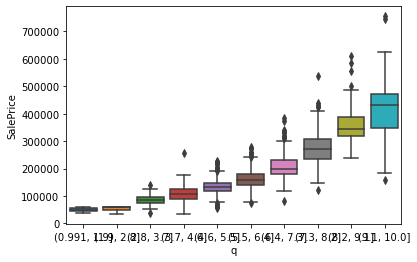

In [39]:
['OverallQual','']

a = data.copy()
a['q'] = pd.cut(data['OverallQual'],10)
sns.boxplot(x='q',y='SalePrice',data=a)
# plt.scatter(x=a['LotArea'],y=a['SalePrice'],color =random.choice(['red','blue','green','yellow']) )


In [40]:
pd.cut(data['OverallQual'],[0,1,np.inf],retbins=True)

(0       (1.0, inf]
 1       (1.0, inf]
 2       (1.0, inf]
 3       (1.0, inf]
 4       (1.0, inf]
            ...    
 1455    (1.0, inf]
 1456    (1.0, inf]
 1457    (1.0, inf]
 1458    (1.0, inf]
 1459    (1.0, inf]
 Name: OverallQual, Length: 1460, dtype: category
 Categories (2, interval[float64]): [(0.0, 1.0] < (1.0, inf]],
 array([ 0.,  1., inf]))

# Advance Model Xgboost, Lighgbm, Catboost, NN, tabNet